<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *FOR the purpose of this analysis, the Monthly Total Rainfall, Relative Humidity, Surface Air Temperature, and Monthly Mean Sunshine hours will be used. Also, a dataset about number of cases of various diseases will be used (Source: MOH).*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *“Is there a relationship between recorded cases of Viral Hepatitis and any weather indicators in Singapore? How can this be leveraged to create better targeted campaigns?”

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Viral Hepatitis: What is it?*
- Definition: Viral Hepatitis is caused by viruses which specifically target the **liver tissue.** 
- There are several different viruses that cause hepatitis, including **Hepatitis A, B, C, D, and E.**

*Viral Hepatitis in Singapore*
- There is a sub-optimal understanding of liver diseases, risk factors, and potential complications among Singaporeans (Tan et al., 2021).
- Some hepatitis strains affect as many as 1 in 25 Singaporeans. Hepatitis is endemic in Singapore (Gan, 2022).
- GSK is building a new S$343 million manufacturing facility in Singapore for Hepatitis B vaccines (CNA, 2023).




### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [182]:
def mean (n):
    total = sum(n) # sums up all the numbers in the given list
    mean = total/len(n) # divides the total by the count of the numbers in the list
    return mean
mean (range(1,11)) # testing the function

5.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [183]:
def std_dev (x):    
    mean_value = mean(x)
    squared_diff_sum = sum((i - mean_value) ** 2 for i in x)
    variance = squared_diff_sum / (len(x))
    std_deviation = variance ** 0.5 # taking the square root of the variance
    return std_deviation

std_dev(range(1,11)) # creating a list to test the formula

2.8722813232690143

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [184]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [185]:
# loading the datasets
rainfall = pd.read_csv('../Datasets/rainfall_monthly_total.csv') 
humidity = pd.read_csv('../Datasets/relative_humidity_monthly_mean.csv')
sunshine = pd.read_csv('../Datasets/sunshine_duration_monthly_mean_daily_duration.csv')
temperature = pd.read_csv('../Datasets/surface_air_temperature_monthly_mean.csv')
rainy_days = pd.read_csv('../Datasets/rainfall_monthly_number_of_rain_days.csv')
disease = pd.read_csv('../Datasets/SG_Disease_Cases.csv')

# Formatting and cleaning the weather dataframes
# Every dataset based on the weather is by month, so it will be easier to merge them into one dataframe.
merge1 = pd.merge(rainfall, sunshine, on = 'month', how = 'left')
merge2 = pd.merge(merge1, humidity, on = 'month', how = 'left')
merge3 = pd.merge(merge2, temperature, on = 'month', how = 'left')
merge4 = pd.merge(merge3, rainy_days, on = 'month', how = 'left')# This is the final merged dataframe

# We need the year and month in separate columns
merge4[['year', 'month_no']] = merge4.month.str.split('-', expand = True)
month_mapping = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Use .map() to replace month numbers with month names
merge4.loc[:, 'month_no'] = merge4['month_no'].map(month_mapping)
year_month = merge4[['year', 'month_no', 'total_rainfall', 'mean_sunshine_hrs', 'mean_rh', 'mean_temp','no_of_rainy_days']] # we are about to drop months, so we save a dataframe with years and months for if we need it later.

# Now, the analysis is going to be yearly, so we do not need the "month_no" column
# Also the "year" column needs to be the left most
merge4.drop(['month_no','month'], axis = 1, inplace = True)
reorder = merge4[['year', 'total_rainfall', 'mean_sunshine_hrs', 'mean_rh', 'mean_temp', 'no_of_rainy_days']]

# Now, the data needs to be grouped by year.
agg_data = {
    'total_rainfall': 'sum',
    'mean_sunshine_hrs': 'mean',
    'mean_rh': 'mean',
    'mean_temp': 'mean',
    'no_of_rainy_days': 'sum'
} # The rainfall and number of rain days are meseaured as an annual total, and the other variables are measured as annual averages.
final_weather = reorder.groupby('year').agg(agg_data).reset_index()

# Notes:
# Some rows from the sunshine, humidity, and temperature dataframes (2022 data) have been left out as the rainfall dataframe has 3 less rows.
# However, the disease data is only till 2021, so the 2022 data is not needed in this analysis anyway.

In [186]:
# Formatting and cleaning the disease dataframe
disease_fixed = disease.replace('na',0) # In this case, for simplicity, null values have been replaced with 0. 
# If this research is repeated, alternative methods of dealing with null values can be considered.
# note that the null values in this dataframe are stored as text, so the replace command has been used.

# To match this with the rainfall dataframe, we need to interchange rows and columns
transposed_df = disease_fixed.T.reset_index()
transposed_df.columns = transposed_df.iloc[0]
transposed_df = transposed_df[1:].reset_index(drop=True)

# Cleaning the columns
transposed_df = transposed_df.rename(columns={'Data Series': 'year'}) # renaming 'Data Series' to 'year'
transposed_df.columns = transposed_df.columns.str.lower().str.replace(' ', '_') # converting to lower case and replacing spaces with '-'

# Sorting the data
transposed_df['year'] = transposed_df['year'].astype(int) # year is stored as object. to sort by oldest to newest, we convert to integer first.
transposed_df = transposed_df.sort_values(by='year') # sorting values by oldest to newest year.
transposed_df = transposed_df.reset_index(drop=True) # resetting the index
transposed_df['year'] = transposed_df['year'].astype(str) # converting 'year' back into object.

# Selecting the right data
final_disease = transposed_df.loc[transposed_df['year'] >= '1982'] # we only need rows from 1982 onwards as weather data starts from 1982.
final_disease = final_disease.reset_index(drop=True)
final_disease = final_disease.apply(pd.to_numeric)
final_disease['year'] = final_disease['year'].astype(str) # converting 'year' back into object.

In [188]:
# Finally, the weather dataset and the disease dataframe are now joined to create the final dataframe.
final_df = pd.merge(final_disease, final_weather, on = 'year', how = 'left')

#Saving the dataframe
final_df.to_csv('../Datasets/final_cleaned_data.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm|
|mean_sunshine_hrs|float|sunshine_duration_monthly_mean_daily_duration|Mean daily sunshine per month in hours|
|mean_rh|float|relative_humidity_monthly_mean|Mean monthly relative humidity in percentage|
|mean_temp|float|surface_air_temperature_monthly_mean|Mean monthly surface air temperature in Celsius|
|no_of_rainy_days|float|rainfall_monthly_number_of_rain_days|Count of number of rainy days per month|
|dengue/dhf|integer|SG_Disease_Cases|Count of annual Dengue cases recorded|
|malaria|integer|SG_Disease_Cases|Count of annual Malaria cases recorded|
|enteric_fever|integer|SG_Disease_Cases|Count of annual Enteric Fever cases recorded|
|viral_hepatitis|integer|SG_Disease_Cases|Count of annual Viral Hepatitis cases recorded|
|cholera|integer|SG_Disease_Cases|Count of annual cholera cases recorded|
|poliomyelitis|integer|SG_Disease_Cases|Count of annual Poliomyelitis cases recorded|
|diphtheria|integer|SG_Disease_Cases|Count of annual Diptheria cases recorded|
|measles|integer|SG_Disease_Cases|Count of annual measles cases recorded|
|legionellosis|integer|SG_Disease_Cases|Count of annual Legionellosis cases recorded|
|nipah_virus_infection|integer|SG_Disease_Cases|Count of annual Nipah Virus cases recorded|
|sars|integer|SG_Disease_Cases|Count of annual SARS cases recorded|
|tuberculosis|integer|SG_Disease_Cases|Count of annual Tuberculosis cases recorded|
|leprosy|integer|SG_Disease_Cases|Count of annual Leprosy cases recorded|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [189]:
# Checking summary statistics of the final dataframe
final_df.describe()

# Applying the sd function to every numeric column
result = final_df.select_dtypes(include='number').agg(std_dev)
sd = result.to_dict()
print(sd)

{'dengue/dhf': 7088.903943796601, 'malaria': 105.27853235584166, 'enteric_fever': 52.989999056425745, 'viral_hepatitis': 167.12498317127813, 'cholera': 14.850841726986387, 'poliomyelitis': 0.5425633603552681, 'diphtheria': 1.139078574989452, 'measles': 44.27750557563061, 'legionellosis': 14.359643971909609, 'nipah_virus_infection': 1.7173744495595598, 'sars': 37.31386304043042, 'tuberculosis': 297.17294522718583, 'leprosy': 16.860530833873526, 'total_rainfall': 451.4325536486597, 'mean_sunshine_hrs': 0.35705561930570123, 'mean_rh': 2.3730964502423375, 'mean_temp': 0.3839919613597258, 'no_of_rainy_days': 22.121200238685063}


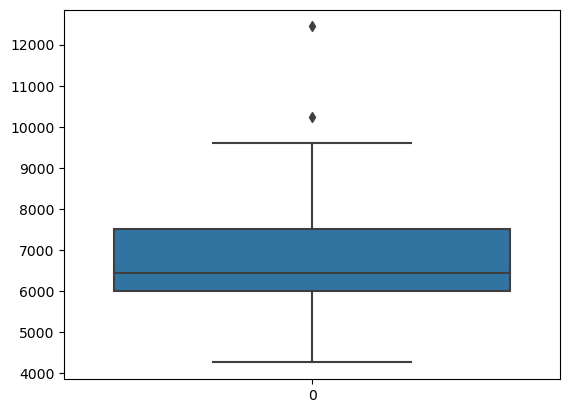

In [190]:
# Answering the five questions
# Q1: Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

# Filter data for the specified years
years_to_analyze = ['1990', '2000', '2010', '2020']
filtered_df = year_month[year_month['year'].isin(years_to_analyze)]

# Find the month with the highest total rainfall for each year
highest_rainfall_months = (
    filtered_df.groupby('year', group_keys = False)
    .apply(lambda group: group.sort_values(by='total_rainfall', ascending=False).head(1))
    .reset_index(drop=True)
)

# Find the month with the lowest total rainfall for each year
lowest_rainfall_months = (
    filtered_df.groupby('year', group_keys = False)
    .apply(lambda group: group.sort_values(by='total_rainfall').head(1))
    .reset_index(drop=True)
)

# Q2: Which year have the highest and lowest total rainfall in the date range of analysis?

# Find the year with the highest rainfall
highest_total_rainfall_year = final_weather.groupby('year')['total_rainfall'].sum().idxmax()
# Find the year with the lowest rainfall
lowest_total_rainfall_year = final_weather.groupby('year')['total_rainfall'].sum().idxmin()

# Q3: Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

# Find the month with the highest number of rainy days for each year
highest_rainfall_days = (
    filtered_df.groupby('year', group_keys = False)
    .apply(lambda group: group.sort_values(by='no_of_rainy_days', ascending=False).head(1))
    .reset_index(drop=True)
)

# Find the month with the lowest number of rainy days for each year
lowest_rainfall_days = (
    filtered_df.groupby('year', group_keys = False)
    .apply(lambda group: group.sort_values(by='no_of_rainy_days').head(1))
    .reset_index(drop=True)
)
# Q4: Which year have the highest and lowest number of rainy days in the date range of analysis?

# Find the year with the highest rainy days
highest_total_rain_year = final_weather.groupby('year')['no_of_rainy_days'].sum().idxmax()
# Find the year with the lowest rainy days
lowest_total_rain_year = final_weather.groupby('year')['no_of_rainy_days'].sum().idxmin()

# Q5: Are there any outlier months in the dataset?

# Aggregating the data by month
month = year_month.drop(['year'], axis = 1)
final_month = month.groupby('month_no').agg(agg_data).reset_index()

# Create the boxplot
sns.boxplot(final_month['total_rainfall'], orient='v')

# Show the plot
plt.show()

In [191]:
# The analysis is by year, so it is more useful to find outliers by year

# Convert the 'year' column to an integer or float
final_df['year'] = pd.to_numeric(final_df['year'])

# Use describe to generate summary statistics
summary_stats = final_df.describe()

# Define a threshold for outlier detection (we use 1.5*IQR)
outlier_threshold = 1.5

# Calculate the IQR for each numeric column
IQRs = summary_stats.loc['75%'] - summary_stats.loc['25%']

# Calculate lower and upper bounds for outliers
lower_bounds = summary_stats.loc['25%'] - outlier_threshold * IQRs
upper_bounds = summary_stats.loc['75%'] + outlier_threshold * IQRs

# Find outlier rows for each numeric column
outlier_rows = {}
no_outliers = []

for column_name in final_df.columns.difference(['year']): # we don't include the year column while calculating outliers
    outliers = final_df[(final_df[column_name] < lower_bounds[column_name]) | (final_df[column_name] > upper_bounds[column_name])]
    if not outliers.empty:
        outlier_rows[column_name] = outliers
    else:
        no_outliers.append(column_name)

# Display the outlier column and year(s)
for column_name, outliers in outlier_rows.items():
    print(f'Outliers in {column_name}:')
    for year in outliers['year']:
        print(year)

# Display variables with no outliers
if no_outliers:
    print('No outliers for the following variables:')
    for variable in no_outliers:
        print(variable)
else:
    print('There are no outliers.')
final_df['year'] = final_df['year'].astype(str) #convert year back into object type

Outliers in cholera:
1987
Outliers in dengue/dhf:
2005
2013
2014
2016
2019
2020
Outliers in diphtheria:
1982
1983
1986
1987
1989
1990
1991
1992
1996
2017
Outliers in enteric_fever:
1996
Outliers in malaria:
1997
1998
Outliers in mean_rh:
2014
2015
2016
2019
2020
2021
Outliers in mean_sunshine_hrs:
2019
Outliers in measles:
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Outliers in nipah_virus_infection:
1999
Outliers in poliomyelitis:
1982
1983
1984
1986
Outliers in sars:
2003
Outliers in tuberculosis:
1997
1998
2010
No outliers for the following variables:
legionellosis
leprosy
mean_temp
no_of_rainy_days
total_rainfall
viral_hepatitis


    **Answers to key questions**
A1 Months with the **highest** rainfall
1990: September
2000: November
2010: July
2020: May

Months with the **lowest** total rainfall:
1990: February
2000: September
2010: February
2020: February

A2 The year with the highest total rainfall is 2007. The year with the lowest total rainfall is 1997.

A3 Month(s) with the **highest** number of rainy days:
1990: September
2000: November
2010: November
2020: July

Month(s) with the lowest number of rainy days:
1990: March 
2000: May                
2010: February               
2020: January

A4 The year with the highest number of rainy days is 2013. The year with the lowest number of rainy days is 1997

A5 There are outlier months in the dataset. An example boxplot to visualise outliers has been shown. 
It is better to calculate outliers by year for this dataset, as disease data is on a yearly level.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


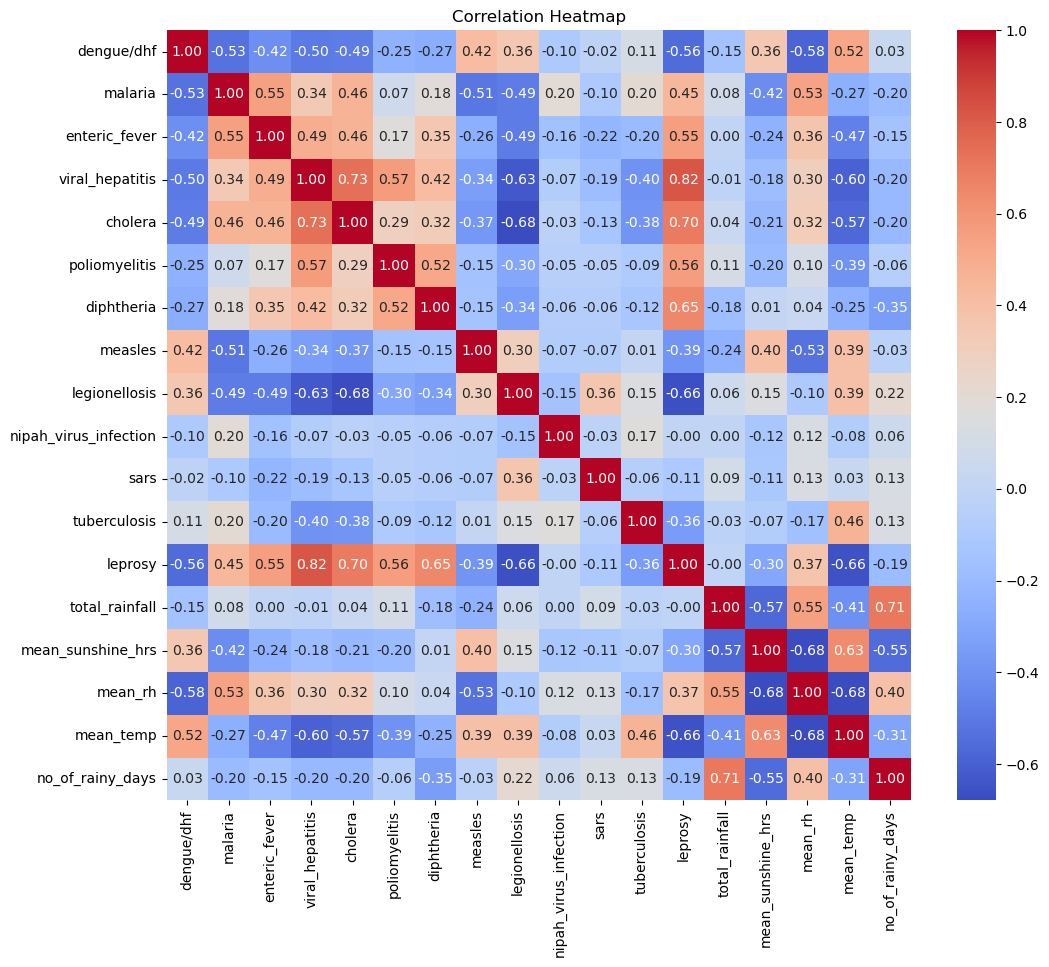

In [192]:
# First, we plot a correlation heatmap
numeric_columns = final_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

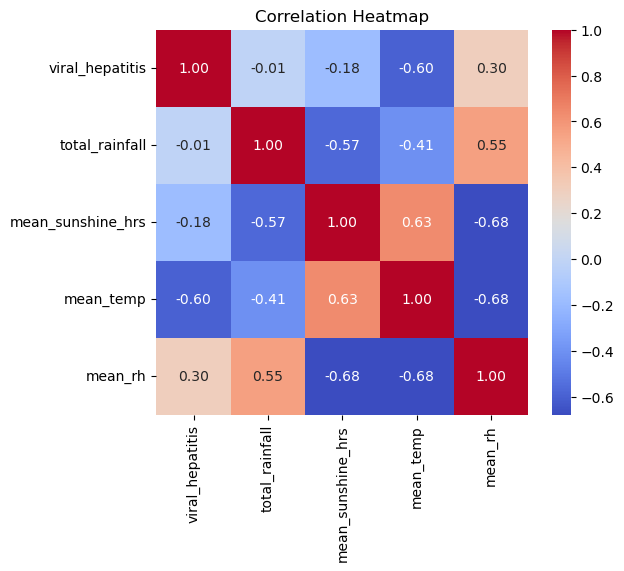

In [193]:
# the full heatmap is too big to be presented, so we create a smaller one
numeric_columns = final_df[['viral_hepatitis', 'total_rainfall', 'mean_sunshine_hrs', 'mean_temp', 'mean_rh']]
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

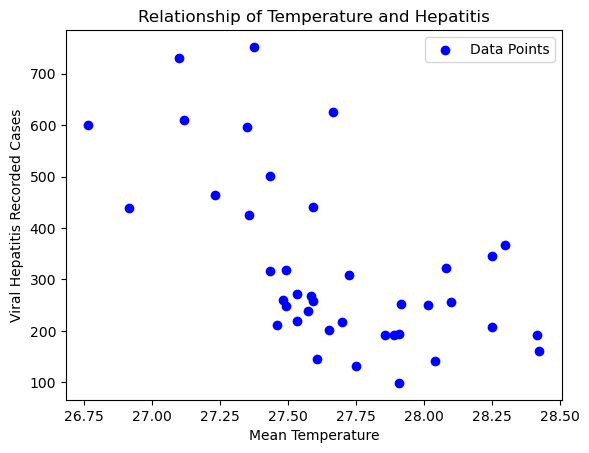

In [194]:
# It is observed that Viral Hepatitis and Surface Temperature are moderately (negatively) correlated.
# Plotting a scatterplot to visualise the correlation.

plt.scatter(final_df['mean_temp'],final_df['viral_hepatitis'] , color='blue', marker='o', label='Data Points')
plt.xlabel('Mean Temperature')
plt.ylabel('Viral Hepatitis Recorded Cases')
plt.title('Relationship of Temperature and Hepatitis')
plt.legend()
plt.show()

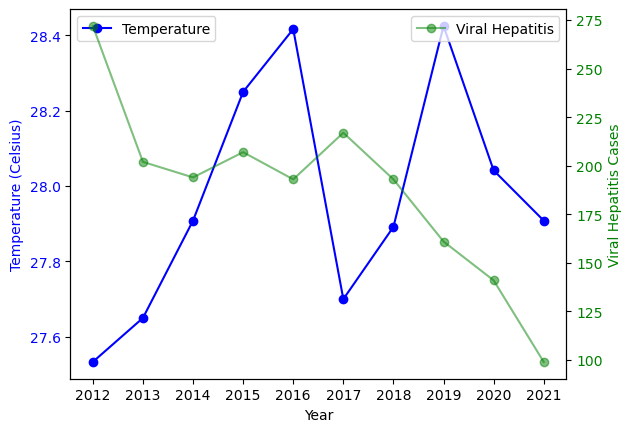

In [195]:
# We need to visualise the relationship between Viral Hepatitis and Mean Temperature in the last 10 years.
# This will give an indication of if the correlation holds recently.

filtered_df = final_df.loc[final_df['year'].astype(int) >= 2012]

# Create a figure and axis
fig, ax1 = plt.subplots()

# Line plot for temperature
ax1.plot(filtered_df['year'], filtered_df['mean_temp'], linestyle='-', marker = 'o', color='blue', label='Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (Celsius)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for the bar plot
ax2 = ax1.twinx()

# Line plot for viral hepatitis
ax2.plot(filtered_df['year'], filtered_df['viral_hepatitis'], color='green', marker = 'o', alpha=0.5, label='Viral Hepatitis')
ax2.set_ylabel('Viral Hepatitis Cases', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

# In general, in the past 10 years, Surface Temperature and Viral Hepatitis cases are negatively correlated.
# In 2020 and 2021, stricter measures were implemented due to COVID-19, likely leading to a fall in cases even when Surface Temperature fell.

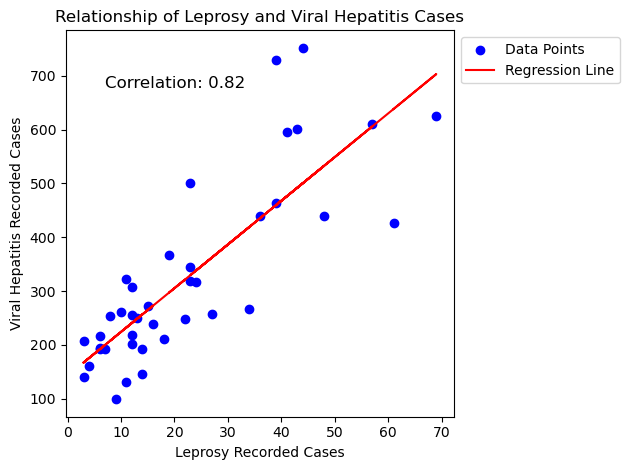

In [196]:
# From the heatmap, it is also observed that leprosy and Viral Hepatitis are strongly correlated (0.82).
# Visualising the relationship between leprosy and Viral Hepatitis.
from scipy.stats import linregress

# data
leprosy_cases = final_df['leprosy']
hepatitis_cases = final_df['viral_hepatitis']

# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(leprosy_cases, hepatitis_cases)

# Scatter plot
plt.scatter(leprosy_cases, hepatitis_cases, color='blue', marker='o', label='Data Points')

# Plot the regression line
regression_line = slope * leprosy_cases + intercept
plt.plot(leprosy_cases, regression_line, color='red', label='Regression Line')

# Add correlation coefficient as text on the plot
corr_text = f'Correlation: {r_value:.2f}'
plt.annotate(corr_text, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)

# Place the legend outside the plot to avoid overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Leprosy Recorded Cases')
plt.ylabel('Viral Hepatitis Recorded Cases')
plt.title('Relationship of Leprosy and Viral Hepatitis Cases')
plt.tight_layout()  # Adjust layout to prevent clipping of the plot
plt.show()


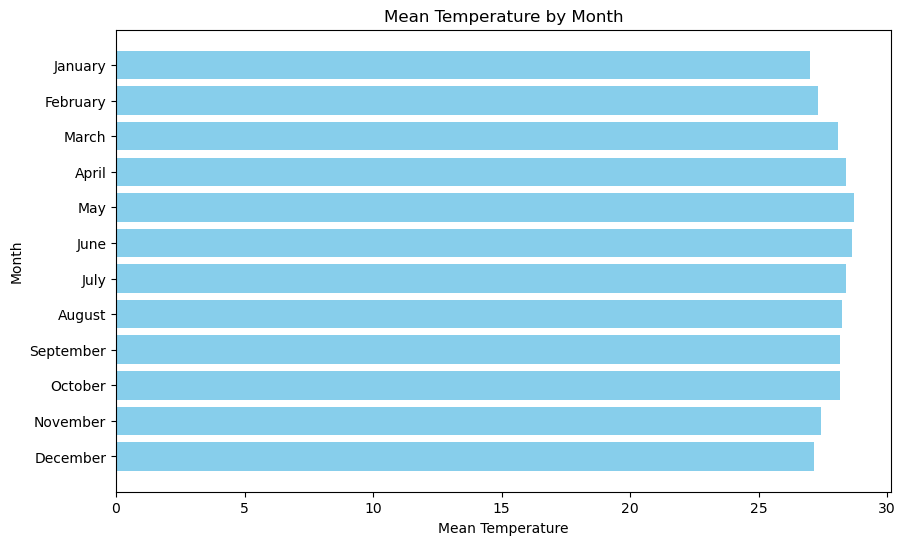

In [200]:
# To create a better targeted campaign, we need to know the average temperature by month for the last 10 years.
# Create a copy of the filtered DataFrame
filtered_recomm = year_month.loc[
    (year_month['year'].astype(int) >= 2012) & 
    (year_month['year'] < '2022')
].copy()

# Drop the 'year' column from the copy
filtered_recomm.drop(['year'], axis=1, inplace=True)
desired_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month, calculate mean, and reset index
final_recomm = filtered_recomm.groupby('month_no').mean().reindex(desired_month_order).reset_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(final_recomm['month_no'], final_recomm['mean_temp'], color='skyblue')
plt.xlabel('Mean Temperature')
plt.ylabel('Month')
plt.title('Mean Temperature by Month')
plt.gca().invert_yaxis()
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Addressing the Problem**

**Q:** Is there a relationship between recorded cases of Viral Hepatitis and weather indicators?
- Viral Hepatitis and air temperature are modestly negatively correlated.
- There are several direct or indirect ways that temperature can affect Viral Hepatitis.
    - Studies conducted suggest that survivability of hepatitis virus decreases with temperature (Mbithi et al., 1991).
    - It is also likely that a change in temperature drives hygiene habits in people.
    - Immune cells are more sluggish colder weather, leaving people more exposed to infection (Thebarge, 2021).
- Recommendation: Create campaigns to inform the public about the relation of weather with Hepatitis.

**Q:** How can this be leveraged to create better targeted campaigns?
- January, February, November, and December are the colder months in Singapore since 2012. 
- Recommendation: Create two buckets to separate various campaigns; Year-Round and Targeted.
    - Year-Round Campaigns: Can be run throughout the year. Examples include vaccination drives, sex education in schools, needle exchange programs, and blood screening.
    - Targeted Campaigns: These should be pushed specifically during colder months to help mitigate Hepatitis infections. Examples include promoting good hygiene, advocating safe sex between adults and other awareness campaigns.
- Moreover,  Hepatitis could be integrated into campaigns about other diseases (like Leprosy).

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!